In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [31]:
data = pd.read_csv('OnlineSurvey.csv', sep = ",")
data.head()

,level,age,devicesUsage,resultIncreased,knowledgeIncreased,target,educationArea,internet,internetType,hoursBefore,hoursAfter,performanceIncreased,instituteType,location,Gender,Issues,device
0,Upto HSC,20.0,Yes,No,Yes,No,Urban,No,Broadband,4,3,No,Public,Rural,Male,Yes,Mobile
1,Hons or Grater,25.0,No,No,No,No,Urban,No,Mobile Internet,4,4,No,Public,Rural,Male,Yes,Mobile
2,Hons or Grater,25.0,Yes,Yes,Yes,Yes,Rural,No,Mobile Internet,5,2,Yes,Public,Rural,Female,Yes,Computer
3,Upto HSC,21.0,Yes,Yes,No,Yes,Urban,Yes,Mobile Internet,5,3,No,Private,Urban,Male,Yes,Mobile
4,Hons or Grater,22.0,Yes,No,No,No,Rural,No,Mobile Internet,4,2,Yes,Public,Urban,Male,No,Mobile


In [32]:
data.shape

(8783, 17)

<AxesSubplot:xlabel='target', ylabel='Count'>

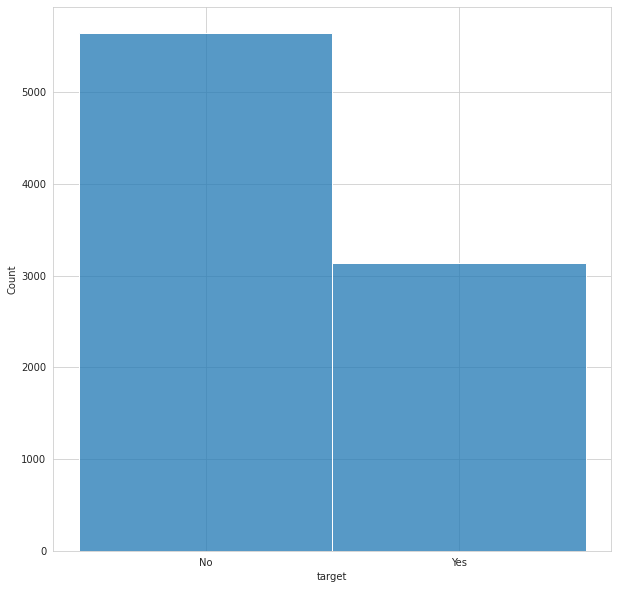

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.histplot(data['target'], discrete=True)

In [34]:
print('Процент пустых данных по столбцам:')
emptyMap = dict(zip(data.columns, data.isnull().sum()))
emptyArr = []

for col, empty in emptyMap.items():
    if empty != 0:
        print('{}\t{}'.format(round(empty / data.shape[0] * 100, 2), col))
        emptyArr.append(col)
        

Процент пустых данных по столбцам:
5.07	age
2.14	devicesUsage
3.68	resultIncreased
6.02	educationArea
8.27	instituteType
8.27	location
7.7	Gender
7.98	Issues


In [35]:
for col in emptyArr:
    data = data.dropna(subset=[col])
data.head()

,level,age,devicesUsage,resultIncreased,knowledgeIncreased,target,educationArea,internet,internetType,hoursBefore,hoursAfter,performanceIncreased,instituteType,location,Gender,Issues,device
0,Upto HSC,20.0,Yes,No,Yes,No,Urban,No,Broadband,4,3,No,Public,Rural,Male,Yes,Mobile
1,Hons or Grater,25.0,No,No,No,No,Urban,No,Mobile Internet,4,4,No,Public,Rural,Male,Yes,Mobile
2,Hons or Grater,25.0,Yes,Yes,Yes,Yes,Rural,No,Mobile Internet,5,2,Yes,Public,Rural,Female,Yes,Computer
3,Upto HSC,21.0,Yes,Yes,No,Yes,Urban,Yes,Mobile Internet,5,3,No,Private,Urban,Male,Yes,Mobile
4,Hons or Grater,22.0,Yes,No,No,No,Rural,No,Mobile Internet,4,2,Yes,Public,Urban,Male,No,Mobile


In [36]:
data.isnull().sum()

level                   0
age                     0
devicesUsage            0
resultIncreased         0
knowledgeIncreased      0
target                  0
educationArea           0
internet                0
internetType            0
hoursBefore             0
hoursAfter              0
performanceIncreased    0
instituteType           0
location                0
Gender                  0
Issues                  0
device                  0
dtype: int64

In [37]:
data.dtypes

level                    object
age                     float64
devicesUsage             object
resultIncreased          object
knowledgeIncreased       object
target                   object
educationArea            object
internet                 object
internetType             object
hoursBefore               int64
hoursAfter                int64
performanceIncreased     object
instituteType            object
location                 object
Gender                   object
Issues                   object
device                   object
dtype: object

In [38]:
def fitTransrotmRepr(df, col):
    encoder = LabelEncoder()
    df[[col]] = encoder.fit_transform(df[[col]])
    encoders = df[col].unique()
    labels = encoder.inverse_transform(encoders)
    labelMap = dict(zip(labels, encoders))
    print('{}: {}'.format(col, labelMap))

In [39]:
typeMap = dict(zip(data.columns, data.dtypes))

for col, typ in typeMap.items():
    if(typ == 'object'):
        fitTransrotmRepr(data, col)

data.head()

level: {'Upto HSC': 1, 'Hons or Grater': 0}
devicesUsage: {'Yes': 1, 'No': 0}
resultIncreased: {'No': 0, 'Yes': 1}
knowledgeIncreased: {'Yes': 1, 'No': 0}
target: {'No': 0, 'Yes': 1}
educationArea: {'Urban': 1, 'Rural': 0}
internet: {'No': 0, 'Yes': 1}
internetType: {'Broadband': 0, 'Mobile Internet': 1}
performanceIncreased: {'No': 0, 'Yes': 1}
instituteType: {'Public': 1, 'Private': 0}
location: {'Rural': 0, 'Urban': 1}
Gender: {'Male': 1, 'Female': 0}
Issues: {'Yes': 1, 'No': 0}
device: {'Mobile': 1, 'Computer': 0}


,level,age,devicesUsage,resultIncreased,knowledgeIncreased,target,educationArea,internet,internetType,hoursBefore,hoursAfter,performanceIncreased,instituteType,location,Gender,Issues,device
0,1,20.0,1,0,1,0,1,0,0,4,3,0,1,0,1,1,1
1,0,25.0,0,0,0,0,1,0,1,4,4,0,1,0,1,1,1
2,0,25.0,1,1,1,1,0,0,1,5,2,1,1,0,0,1,0
3,1,21.0,1,1,0,1,1,1,1,5,3,0,0,1,1,1,1
4,0,22.0,1,0,0,0,0,0,1,4,2,1,1,1,1,0,1


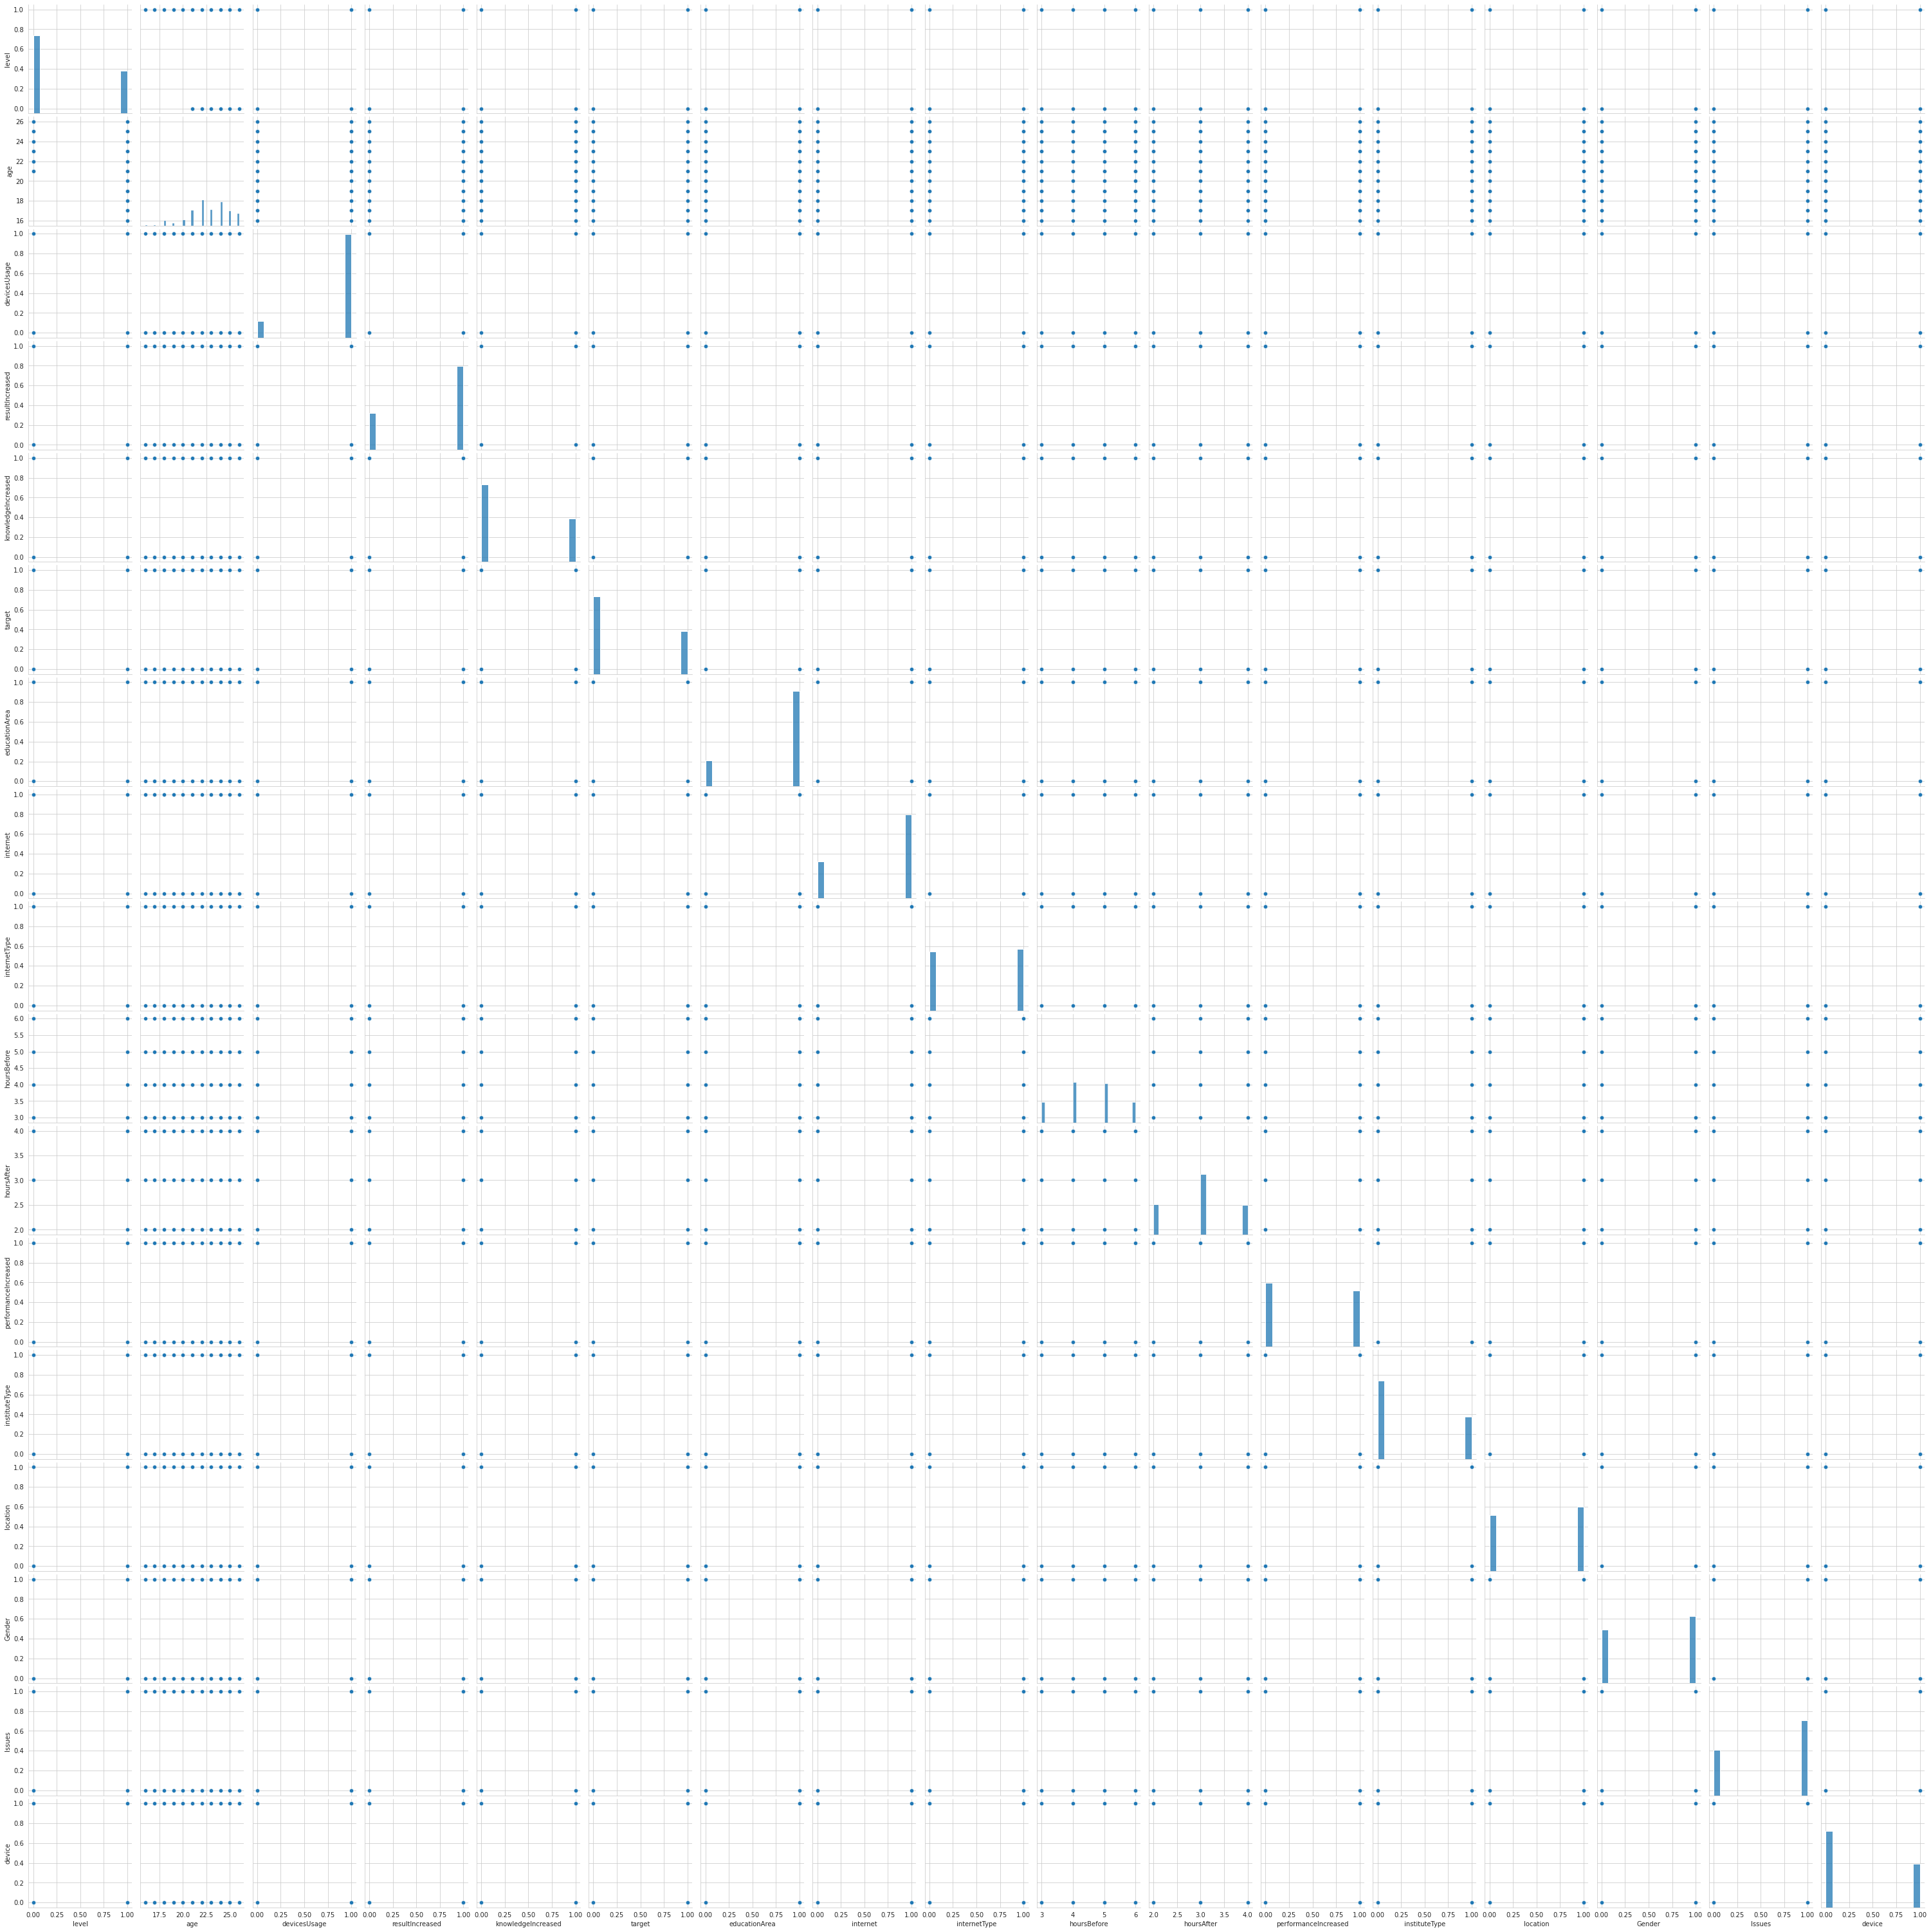

In [40]:
sns.pairplot(data)

<AxesSubplot:>

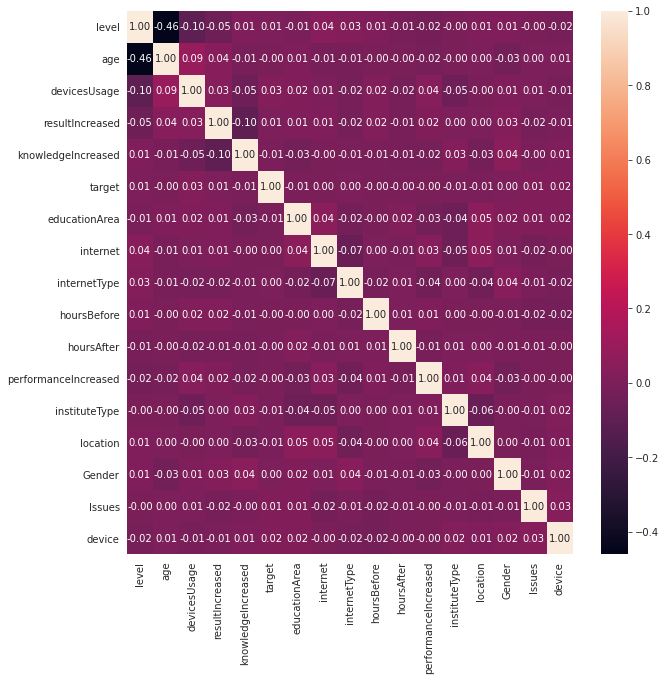

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

In [42]:
class FeatureSelector:
    def __init__(self, df, target, method, index, isModel):
        if isModel:
            model = method()
            model.fit(df.drop(columns=[target]), df[target])
            self.mic = model.feature_importances_
            
        elif index:
            self.mic = method(df.drop(columns=[target]), df[target])[1]
            
        else:
            self.mic = method(df.drop(columns=[target]), df[target])
            
        self.mic = pd.Series(self.mic)
        self.mic.index = df.drop(columns=[target]).columns
        
    def represent(self):    
        self.mic.sort_values(ascending=False).plot.bar()

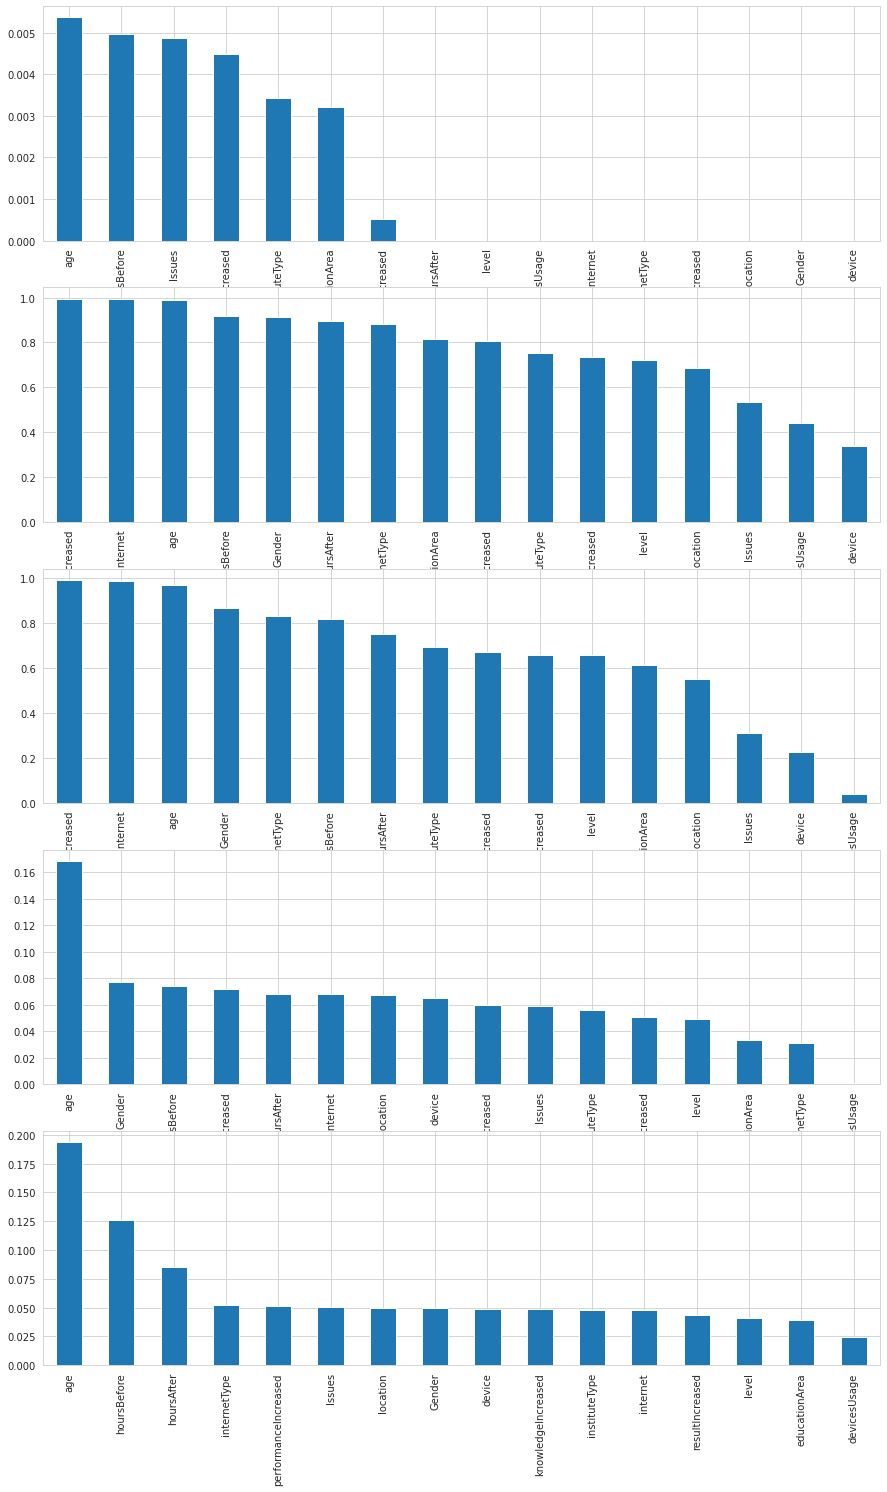

In [43]:
selectors = [
    FeatureSelector(data, 'target', mutual_info_classif, False, False),
    FeatureSelector(data, 'target', chi2, True, False),
    FeatureSelector(data, 'target', f_classif, True, False),
    FeatureSelector(data, 'target', DecisionTreeClassifier, False, True),
    FeatureSelector(data, 'target', RandomForestClassifier, False, True)
]
plt.subplots(figsize=(15,25))
for i in range(len(selectors)):
    plt.subplot(5, 1, i + 1)
    selectors[i].represent()

In [44]:
def joinhist(df, col, target):
    plt.subplots(figsize=(15,10))
    
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], discrete=True)
    
    plt.subplot(2, 2, 3)
    sns.histplot(df, x=col, y=target, discrete=True)

    plt.subplot(2, 2, 4)
    sns.histplot( y = df[target], discrete=True)

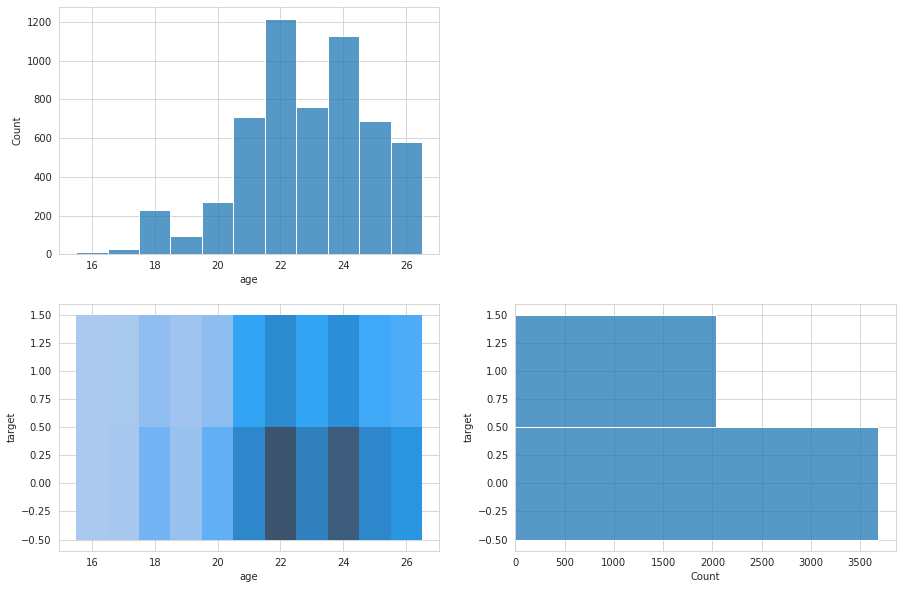

In [45]:
joinhist(data, 'age', 'target')

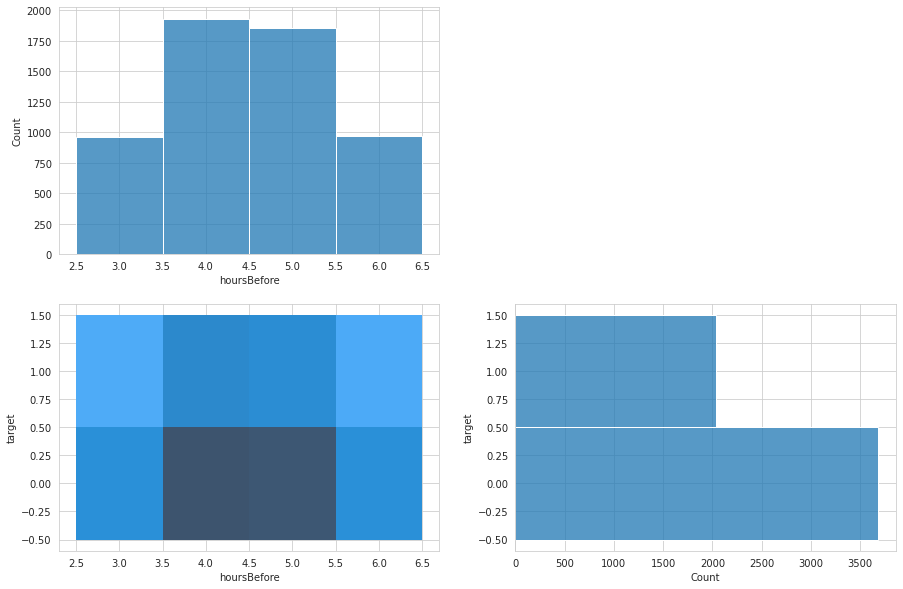

In [46]:
joinhist(data, 'hoursBefore', 'target')

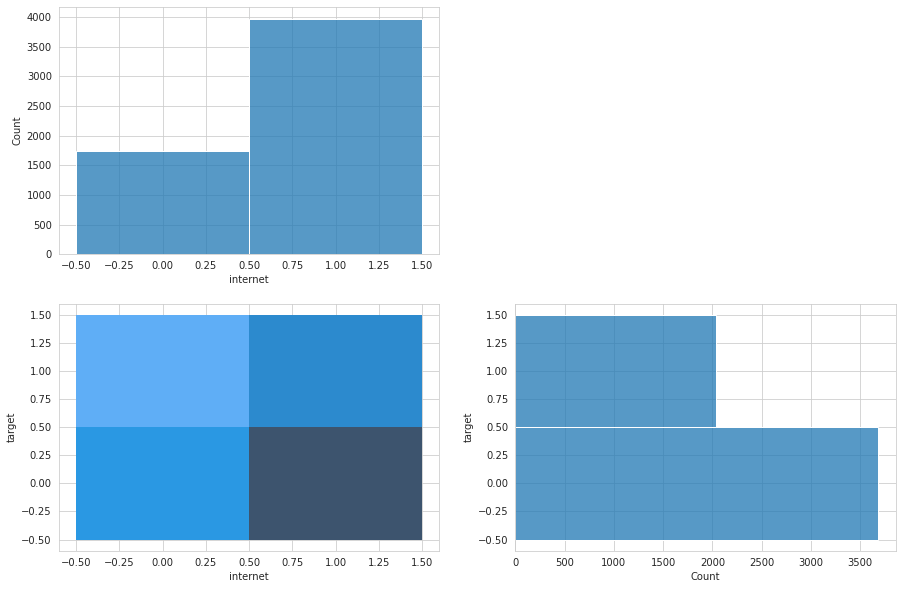

In [47]:
joinhist(data, 'internet', 'target')

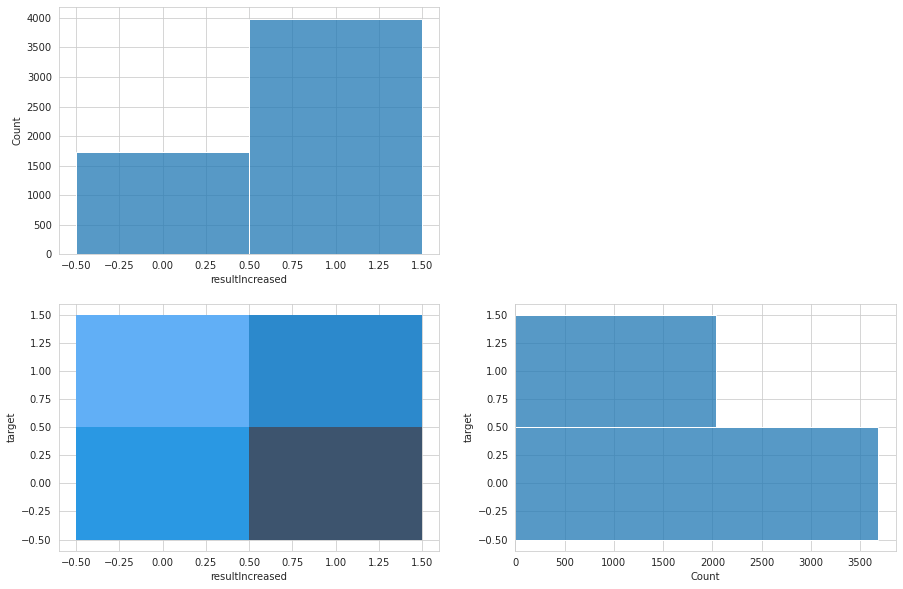

In [48]:
joinhist(data, 'resultIncreased', 'target')

<AxesSubplot:xlabel='target', ylabel='age'>

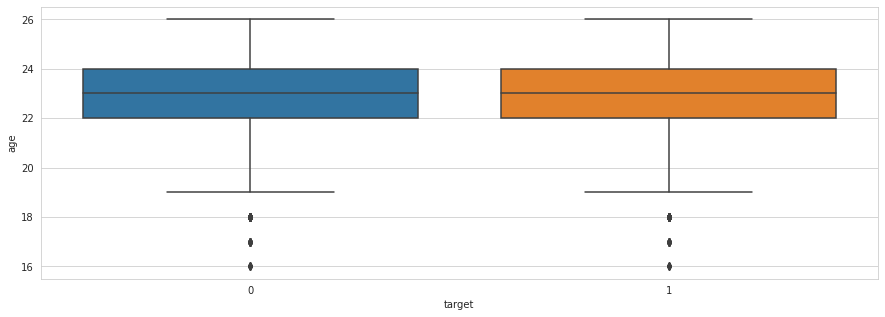

In [49]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.boxplot(x='target', y='age', data=data)

In [56]:
selectedFeatures = [
    'knowledgeIncreased',
    'resultIncreased',
    'performanceIncreased',
    'level',
    'age',
    'educationArea',
    'internet',
    'internetType',
    'hoursBefore',
    'hoursAfter',
    'instituteType',
    'location',
    'Gender'
]

In [57]:
models = {
    'KNN': KNeighborsClassifier,
    'LR': LogisticRegression,
    'DTC': DecisionTreeClassifier,
    'RFC': RandomForestClassifier,
    'GBC': GradientBoostingClassifier
    
}

In [58]:
xTrain, xTest, yTrain, yTest =  train_test_split(
    data.drop(columns=['target']),
    data['target'], test_size=0.3, 
    random_state = 1)

In [59]:
report = []
for modelName, model in models.items():
    tmp = [modelName + '_all',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(
    data[selectedFeatures],
    data['target'], 
    test_size=0.3, 
    random_state = 1)

In [61]:
for modelName, model in models.items():
    tmp = [modelName + '_sel',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [62]:
dfReport = pd.DataFrame(report, columns=['Model','Accuracy','Precision','Recall'])
dfReport = dfReport.sort_values(by=['Model'])
dfReport.head(10)

,Model,Accuracy,Precision,Recall
2,DTC_all,0.562682,0.387789,0.382736
7,DTC_sel,0.536443,0.347386,0.335505
4,GBC_all,0.643149,0.571429,0.013029
9,GBC_sel,0.639067,0.380952,0.013029
0,KNN_all,0.567930,0.339241,0.218241
5,KNN_sel,0.555685,0.306283,0.190554
1,LR_all,0.641983,0.000000,0.000000
6,LR_sel,0.641983,0.000000,0.000000
3,RFC_all,0.590087,0.303965,0.112378
8,RFC_sel,0.590087,0.360502,0.187296


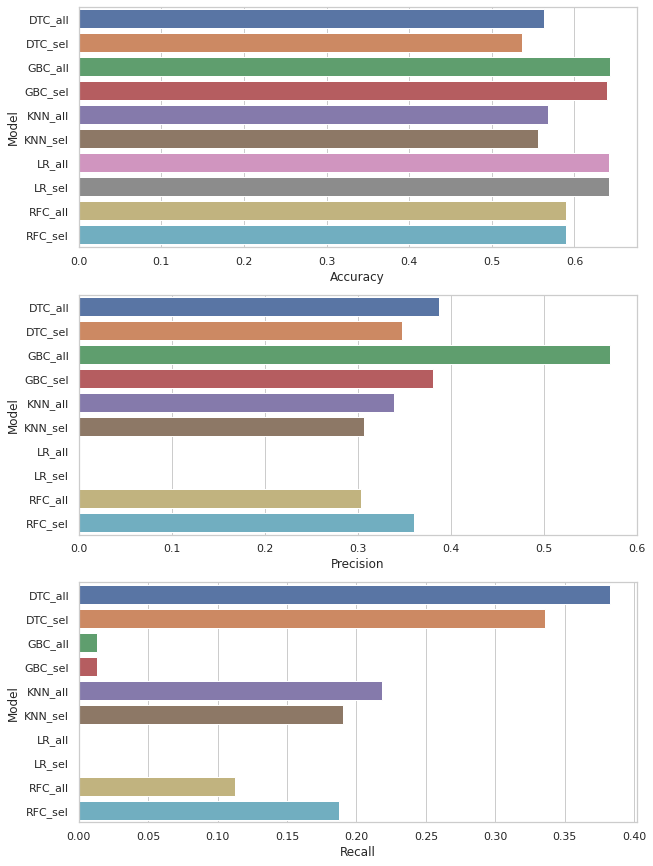

In [63]:
i = 1
for col in dfReport.drop(columns=['Model']):
    sns.set(rc={'figure.figsize':(10,15)})
    sns.set_style("whitegrid")
    plt.subplot(3, 1, i)
    sns.barplot(x=col, y="Model", data=dfReport)
    i += 1